# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Polarizacion-de-la-fuente-de-luz" data-toc-modified-id="Polarizacion-de-la-fuente-de-luz-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polarizacion de la fuente de luz</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-polarizador-para-ver-fluctuaciones-de-la-fuente" data-toc-modified-id="Rotación-de-polarizador-para-ver-fluctuaciones-de-la-fuente-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rotación de polarizador para ver fluctuaciones de la fuente</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Polarizacion de la fuente de luz

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   12/03/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1

**Procedimiento**:
Se supone que la fuente tiene que ser aproximadamente circulamente polarizada. Por ello, al pasar por un polarizador lineal, tiene que fluctuar poco.

1. Se gira el polarizador una vuelta para ver el rizado de la fuente. 


**Resultado**

Vector de Stokes de la fuente de luz


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

## Tarjeta de adquisición de datos

In [3]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [4]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

## Motores

In [5]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels = [600, 600, 600, 600]

In [6]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 3
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 4
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 7


## Rotación de polarizador para ver fluctuaciones de la fuente


In [7]:
num_data=90
angles=sp.linspace(0,360,num_data)
intensities_1=sp.zeros_like(angles,dtype=float)

In [8]:
for i, angle in enumerate(angles):
    motors.move(
        positions=[angle, 0, 0, 0], velocities=Vels, verbose=False)
    intensities_1[i]=I0=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

1.6591, 1.6591, 1.6591, 1.6642, 1.6591, 1.6642, 1.6642, 1.6642, 1.6693, 1.6693, 1.6693, 1.6693, 1.6744, 1.6744, 1.6796, 1.6847, 1.6847, 1.6847, 1.6796, 1.6796, 1.6796, 1.6796, 1.6847, 1.6796, 1.6796, 1.6796, 1.6796, 1.6796, 1.6744, 1.6744, 1.6744, 1.6744, 1.6693, 1.6744, 1.6693, 1.6693, 1.6693, 1.6642, 1.6642, 1.6642, 1.6642, 1.6642, 1.6642, 1.6693, 1.6693, 1.6693, 1.6693, 1.6693, 1.6693, 1.6693, 1.6744, 1.6744, 1.6796, 1.6744, 1.6847, 1.6796, 1.6847, 1.6898, 1.6847, 1.6898, 1.6949, 1.6898, 1.6898, 1.6898, 1.6898, 1.6898, 1.6847, 1.6847, 1.6847, 1.6847, 1.6796, 1.6744, 1.6796, 1.6744, 1.6693, 1.6744, 1.6693, 1.6693, 1.6642, 1.6642, 1.6591, 1.6591, 1.6591, 1.6591, 1.6591, 1.6540, 1.6540, 1.6540, 1.6540, 1.6591, 

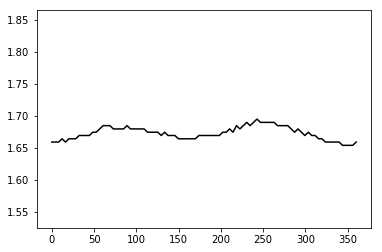

In [9]:
filename="step1_source_{}".format(datetime.date.today())

plt.figure()
plt.plot(angles,intensities_1,'k')
plt.ylim(intensities_1.max()*0.9,intensities_1.max()*1.1)
plt.savefig(filename+'.pdf')

In [10]:
filename="step1_source_{}".format(datetime.date.today())

np.save(filename+'.npy', np.array([angles, intensities_1]).transpose())
np.savetxt(filename+'.txt', np.array([angles, intensities_1]).transpose() )
savemat(filename+'.mat', {'angles': angles, 'intensities_1': intensities_1})

## Final

In [11]:
motors.close()
del motors
LabJackPython.Close()